# Showcase Peony Project

### Import Peony Packages

In [1]:
from PeonyPackage.PeonyDb import MongoDb
from Peony_visualization.src.peony_visualization import calculate_binary_metrics
from Peony_box.src.peony_box_model import PeonyBoxModel
from Peony_box.src.transformators.HuffPost_transformator import HuffPostTransform as transformator
from Peony_database.src.datasets.HuffPost_news_dataset import (
    COLLECTION_NAME as HuffPost_collection_name,
    COLLECTION_ID as HuffPost_collection_id,
)
from Peony_box.src.utils import k_fold_corss_validation
from Peony_box.src.acquisition_functions.functions import entropy_sampling
from Peony_visualization.src.peony_visualization import visualize_two_auc_evolutions

### Import Other Packages

In [2]:
import numpy as np

from IPython.utils import io
from tqdm import tqdm_notebook as tqdm
from sklearn.utils import shuffle

## Create Peony Databse API

In [3]:
api = MongoDb()

## Get articles and labebls from Peony Databse

In [4]:
sport_records = api.get_record(
    collection_name=HuffPost_collection_name,
    collection_id=HuffPost_collection_id,
    label="SPORTS",
    limit=500,
)

comedy_records = api.get_record(
    collection_name=HuffPost_collection_name,
    collection_id=HuffPost_collection_id,
    label="COMEDY",
    limit=500,
)

instances = sport_records + comedy_records
labels = [sample["record"]["label"] for sample in sport_records + comedy_records]

instances, labels = shuffle(instances, labels, random_state=0)

## Create and Fit Transformator

In [5]:
HuffPostTransform = transformator()
_ = HuffPostTransform.transform_instances(instances)

100%|██████████| 1000/1000 [00:00<00:00, 103791.15it/s]


## K-Fold Cross Validation and Visualization

### Random Forest K-Fold Cross Validation

In [6]:
peony_model = PeonyBoxModel(HuffPostTransform)
k_fold = k_fold_corss_validation(
        peony_model.random_forest_model, HuffPostTransform, instances, labels, 10
    )

100%|██████████| 1000/1000 [00:00<00:00, 215856.31it/s]

transforming instances for k fold cross validation...



  0%|          | 0/10 [00:00<?, ?it/s]

transforming labels for k fold cross validation...
k fold cross validation...


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


### Random Forest Results

Label 11 in mapped to 0, label 12 in mapped to 1


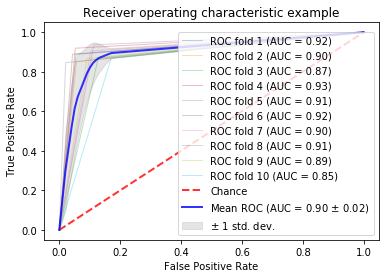

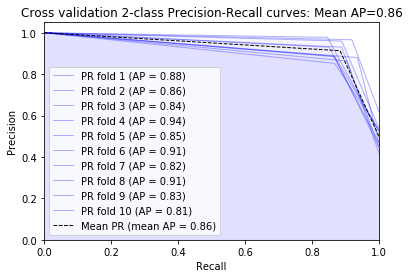

In [7]:
calculate_binary_metrics(k_fold)

### SVM K-Fold Cross Validation

In [8]:
peony_model = PeonyBoxModel(HuffPostTransform)
k_fold = k_fold_corss_validation(
        peony_model.svm_model, HuffPostTransform, instances, labels, 10
    )

100%|██████████| 1000/1000 [00:00<00:00, 167170.35it/s]

transforming instances for k fold cross validation...



  0%|          | 0/10 [00:00<?, ?it/s]

transforming labels for k fold cross validation...
k fold cross validation...


100%|██████████| 10/10 [00:45<00:00,  4.55s/it]


### SVM Results

Label 11 in mapped to 0, label 12 in mapped to 1


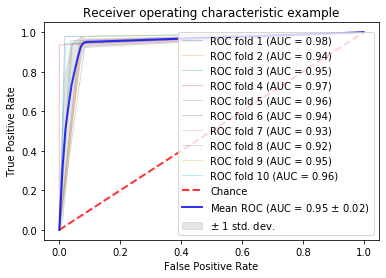

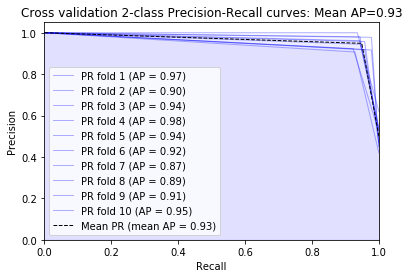

In [9]:
calculate_binary_metrics(k_fold)

### Feed Forward NN K-Fold Cross Validation

In [10]:
peony_model = PeonyBoxModel(HuffPostTransform)
k_fold = k_fold_corss_validation(
        peony_model.feed_forward_nn, HuffPostTransform, instances, labels, 10
    )

100%|██████████| 1000/1000 [00:00<00:00, 199282.75it/s]

transforming instances for k fold cross validation...



  0%|          | 0/10 [00:00<?, ?it/s]

transforming labels for k fold cross validation...
k fold cross validation...


100%|██████████| 10/10 [40:19<00:00, 241.92s/it]

starting loss (ensembles mean) is 3.715952157974243 , fitted loss (ensembles mean) is 2.76412034034729
starting loss (ensembles mean) is 3.712739944458008 , fitted loss (ensembles mean) is 2.7621750831604004
starting loss (ensembles mean) is 3.710862398147583 , fitted loss (ensembles mean) is 2.761155605316162
starting loss (ensembles mean) is 3.7066657543182373 , fitted loss (ensembles mean) is 2.7599666118621826
starting loss (ensembles mean) is 3.7118210792541504 , fitted loss (ensembles mean) is 2.7612500190734863
starting loss (ensembles mean) is 3.706815481185913 , fitted loss (ensembles mean) is 2.7627828121185303
starting loss (ensembles mean) is 3.722141981124878 , fitted loss (ensembles mean) is 2.761749267578125
starting loss (ensembles mean) is 3.714064836502075 , fitted loss (ensembles mean) is 2.7617239952087402
starting loss (ensembles mean) is 3.7123782634735107 , fitted loss (ensembles mean) is 2.7608819007873535
starting loss (ensembles mean) is 3.7085604667663574 , f

### Feed Forward NN Results

Label 11 in mapped to 0, label 12 in mapped to 1


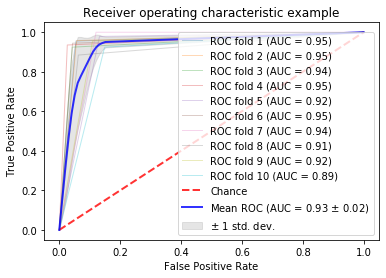

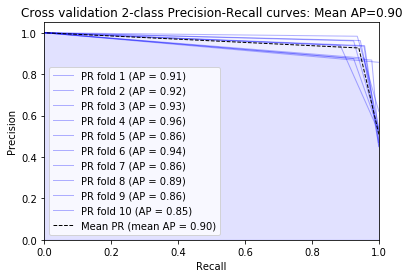

In [11]:
calculate_binary_metrics(k_fold)

## Active Learning Utils

### Initialize model -> Fit model -> Retrain model with extended training dataset

### Random Forest

In [12]:
#Initialize and fit model
peony_model = PeonyBoxModel(HuffPostTransform, active_learning_step=5)
peony_model.random_forest_model.fit(instances[100:], labels[100:])

#Get new training samples indices (random training samples indices)
indices = peony_model.random_forest_model.get_learning_samples(instances[:50])

additional_instances = [instances[index] for index in indices.tolist()]
additional_labels = [labels[index] for index in indices.tolist()]

#Retrain the model with new extended training dataset
peony_model.random_forest_model.add_new_learning_samples(additional_instances, additional_labels)

100%|██████████| 900/900 [00:00<00:00, 74800.33it/s]

transforming instances for model training...



100%|██████████| 900/900 [00:00<00:00, 1263344.58it/s]


transforming labels for model training...


100%|██████████| 5/5 [00:00<00:00, 26479.19it/s]

transforming instances for model getting learning sample...
transforming instances for model training...
transforming labels for model training...


### SVM

In [13]:
#Initialize and fit model
peony_model = PeonyBoxModel(HuffPostTransform, active_learning_step=5)
peony_model.svm_model.fit(instances[100:], labels[100:])

#Get new training samples indices (random training samples indices)
indices = peony_model.svm_model.get_learning_samples(instances[:50])

additional_instances = [instances[index] for index in indices.tolist()]
additional_labels = [labels[index] for index in indices.tolist()]

#Retrain the model with new extended training dataset
peony_model.svm_model.add_new_learning_samples(additional_instances, additional_labels)

100%|██████████| 900/900 [00:00<00:00, 188319.96it/s]

transforming instances for model training...



100%|██████████| 900/900 [00:00<00:00, 597763.04it/s]


transforming labels for model training...


100%|██████████| 50/50 [00:00<00:00, 199349.05it/s]

transforming instances for model getting learning sample...



100%|██████████| 5/5 [00:00<00:00, 15054.93it/s]

transforming instances for model training...
transforming labels for model training...


### Feed Forward NN

In [14]:
#Initialize and fit model
peony_model = PeonyBoxModel(HuffPostTransform, active_learning_step=5)
peony_model.feed_forward_nn.fit(instances[100:], labels[100:])

#Get new training samples indices (random training samples indices)
indices = peony_model.feed_forward_nn.get_learning_samples(instances[:50])

additional_instances = [instances[index] for index in indices.tolist()]
additional_labels = [labels[index] for index in indices.tolist()]

#Retrain the model with new extended training dataset
peony_model.feed_forward_nn.add_new_learning_samples(additional_instances, additional_labels)

100%|██████████| 900/900 [00:00<00:00, 465172.35it/s]

transforming instances for model training...



100%|██████████| 900/900 [00:00<00:00, 1213005.66it/s]


transforming labels for model training...


100%|██████████| 5/5 [00:00<00:00, 13289.94it/s]

transforming instances for model getting learning sample...
transforming instances for model training...
transforming labels for model training...
